# Clothing Recommendation

In [10]:
# import necessary dependencies
import re
import numpy as np
import pandas as pd
import requests
import time
import json

In [11]:
# url setup
marine_layer_url = 'https://marinelayer.com/products.json'
allbirds_url = 'https://www.allbirds.com/products.json'

In [12]:
marine_layer = requests.get(marine_layer_url).json()
allbirds = requests.get(allbirds_url).json()

In [13]:
# explore marine layer
marine_df = pd.DataFrame(marine_layer['products'])
marine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   title         30 non-null     object
 2   handle        30 non-null     object
 3   body_html     30 non-null     object
 4   published_at  30 non-null     object
 5   created_at    30 non-null     object
 6   updated_at    30 non-null     object
 7   vendor        30 non-null     object
 8   product_type  30 non-null     object
 9   tags          30 non-null     object
 10  variants      30 non-null     object
 11  images        30 non-null     object
 12  options       30 non-null     object
dtypes: int64(1), object(12)
memory usage: 3.2+ KB


### Data Exploration

In [16]:
marine_df['images'][0]

[{'id': 28475302903882,
  'created_at': '2022-01-26T10:49:31-08:00',
  'position': 1,
  'updated_at': '2022-01-26T10:49:34-08:00',
  'product_id': 6735559229514,
  'variant_ids': [],
  'src': 'https://cdn.shopify.com/s/files/1/0831/9103/products/LS_Selvage_Shirt_Garment_Dye_Ombre_Blue-Final-web-v2.jpg?v=1643222974',
  'width': 961,
  'height': 1139},
 {'id': 28541187620938,
  'created_at': '2022-02-23T17:43:13-08:00',
  'position': 2,
  'updated_at': '2022-02-23T17:43:15-08:00',
  'product_id': 6735559229514,
  'variant_ids': [],
  'src': 'https://cdn.shopify.com/s/files/1/0831/9103/products/midbluebd.jpg?v=1645666995',
  'width': 961,
  'height': 1140},
 {'id': 28472647876682,
  'created_at': '2022-01-24T17:09:03-08:00',
  'position': 3,
  'updated_at': '2022-02-23T17:43:15-08:00',
  'product_id': 6735559229514,
  'variant_ids': [],
  'src': 'https://cdn.shopify.com/s/files/1/0831/9103/products/lsselvage5.jpg?v=1645666995',
  'width': 960,
  'height': 1139},
 {'id': 28472647909450,
  

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
img_id = marine_df['images'][0][0]['id']
img_src = marine_df['images'][0][0]['src']

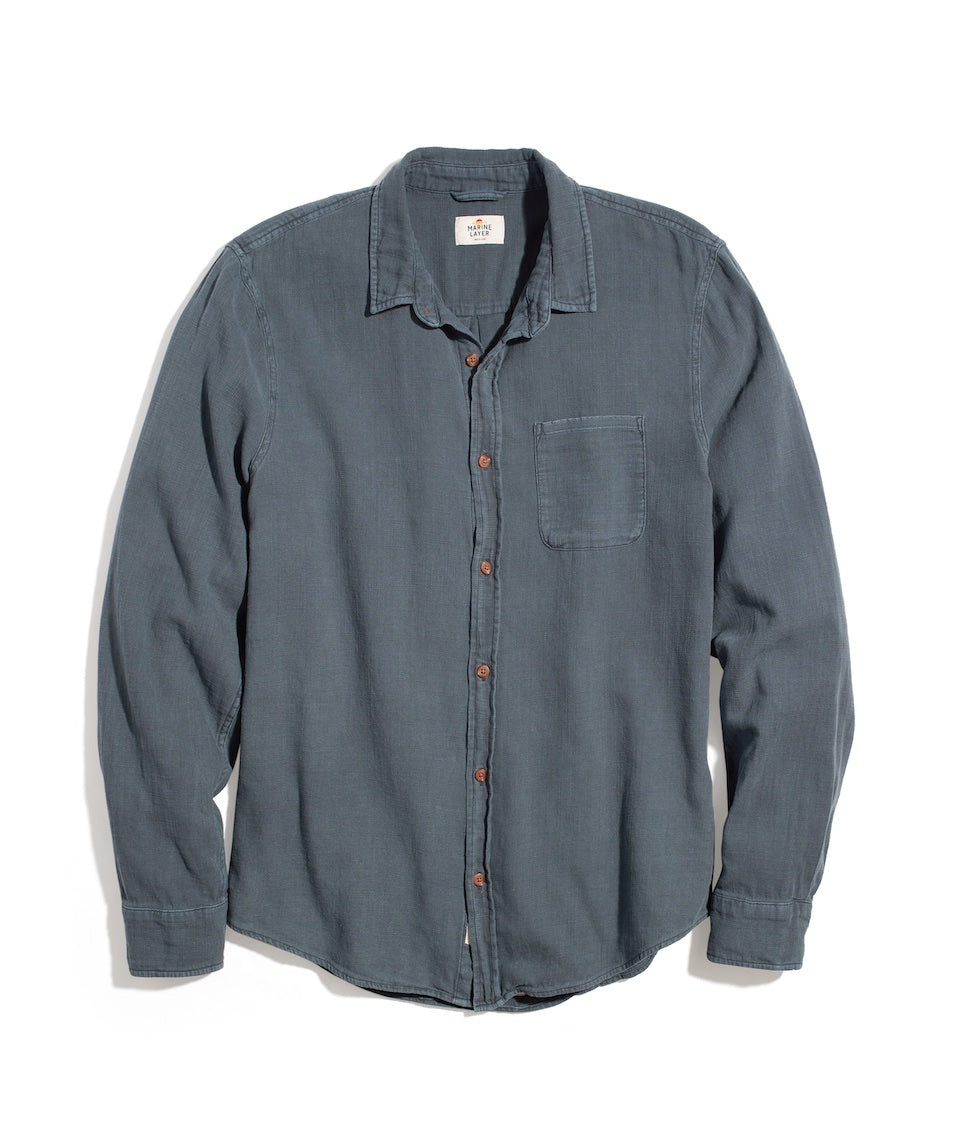

In [27]:
# display image
im = Image.open(requests.get(img_src, stream=True).raw)
im

In [28]:
marine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30 non-null     int64 
 1   title         30 non-null     object
 2   handle        30 non-null     object
 3   body_html     30 non-null     object
 4   published_at  30 non-null     object
 5   created_at    30 non-null     object
 6   updated_at    30 non-null     object
 7   vendor        30 non-null     object
 8   product_type  30 non-null     object
 9   tags          30 non-null     object
 10  variants      30 non-null     object
 11  images        30 non-null     object
 12  options       30 non-null     object
dtypes: int64(1), object(12)
memory usage: 3.2+ KB


In [44]:
marine_df['variants'][:2]

0    [{'id': 39549796221002, 'title': 'Small / Ombr...
1    [{'id': 39549614686282, 'title': 'Extra Small ...
Name: variants, dtype: object

In [45]:
marine_df['images'][:2]

0    [{'id': 28475302903882, 'created_at': '2022-01...
1    [{'id': 28467636895818, 'created_at': '2022-01...
Name: images, dtype: object

In [47]:
marine_df['options'][0]

[{'name': 'Size',
  'position': 1,
  'values': ['Small',
   'Medium',
   'Marge',
   'Large',
   'Larger',
   'Extra Large',
   '2XL']},
 {'name': 'Color', 'position': 2, 'values': ['Ombre Blue']}]